<a href="https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/Atividade_3_2_Explorando_redes_neurais_CNN_RNN_Exploring_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A

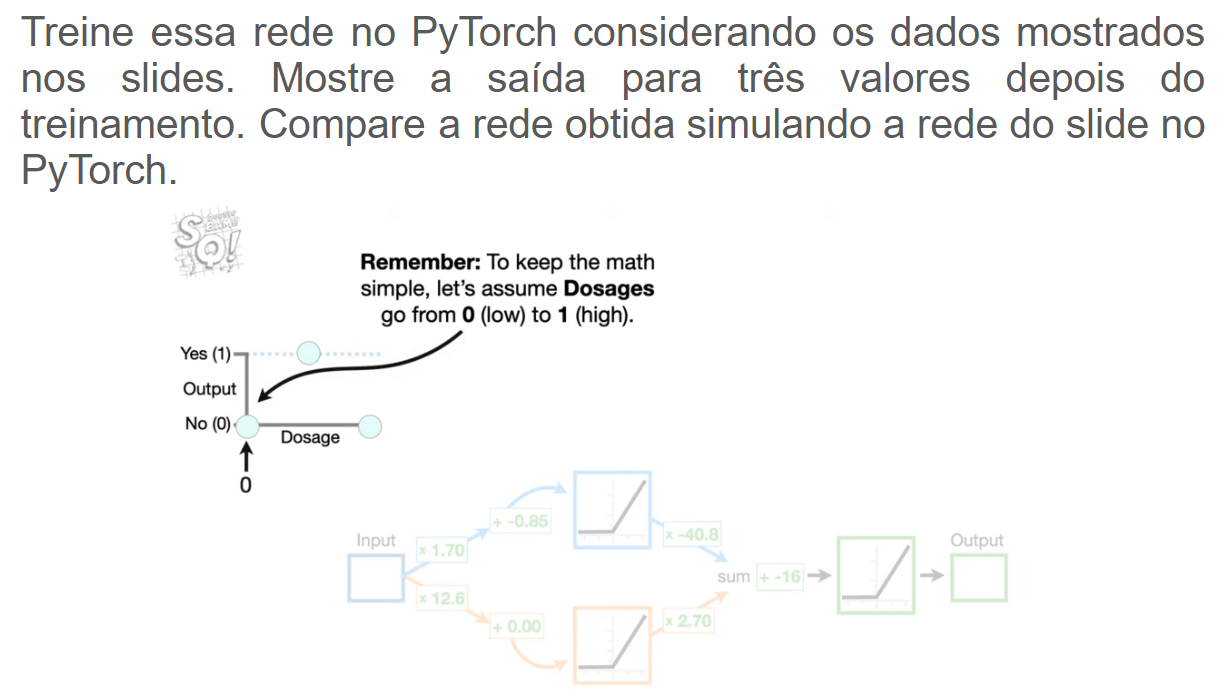

Epoch 0 - Loss: 0.1865
Epoch 100 - Loss: 0.0992
Epoch 200 - Loss: 0.0630
Epoch 300 - Loss: 0.0089
Epoch 400 - Loss: 0.0019
Epoch 500 - Loss: 0.0008
Epoch 600 - Loss: 0.0006
Epoch 700 - Loss: 0.0006
Epoch 800 - Loss: 0.0006
Epoch 900 - Loss: 0.0006


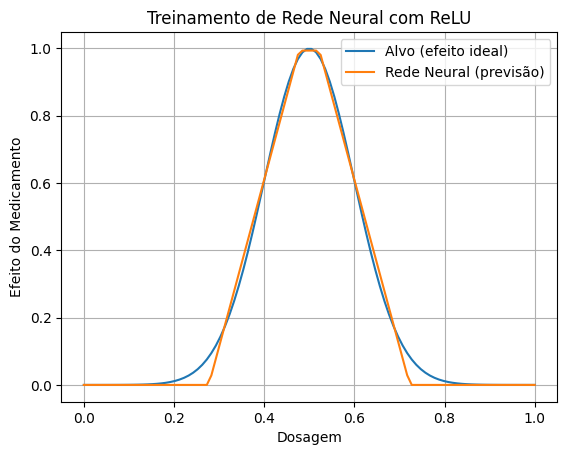

Pesos e bias da camada oculta:
Pesos: tensor([[-3.0744],
        [ 2.8810]])
Bias: tensor([ 1.4673, -1.5057])

Pesos e bias da camada de saída:
Pesos: tensor([[-1.6153, -1.7219]])
Bias: tensor([0.9938])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(0, 1, 100).unsqueeze(1)  # 100 pontos entre 0 e 1
y = torch.exp(-((x - 0.5)**2) / 0.02)  # Função Gaussiana aproximada, pico em x=0.5

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 2)  # 1 entrada, 2 neurônios na camada oculta
        self.relu = nn.ReLU()
        self.output = nn.Linear(2, 1)  # 2 entradas da oculta, 1 saída final
        self.relu_out = nn.ReLU()      # ReLU na saída

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.relu_out(x)
        return x

# Instanciando a rede
model = SimpleNN()

# Função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinamento
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(x)
    loss = criterion(predictions, y)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch} - Loss: {loss.item():.4f}")

# Plotando o resultado
with torch.no_grad():
    y_pred = model(x)

plt.plot(x.numpy(), y.numpy(), label='Alvo (efeito ideal)')
plt.plot(x.numpy(), y_pred.numpy(), label='Rede Neural (previsão)')
plt.xlabel('Dosagem')
plt.ylabel('Efeito do Medicamento')
plt.title('Treinamento de Rede Neural com ReLU')
plt.legend()
plt.grid(True)
plt.show()


print("Pesos e bias da camada oculta:")
print("Pesos:", model.hidden.weight.data)
print("Bias:", model.hidden.bias.data)

print("\nPesos e bias da camada de saída:")
print("Pesos:", model.output.weight.data)
print("Bias:", model.output.bias.data)

In [ ]:
def prever_efeito(dosagem):
    model.eval()  # Garante que a rede está em modo de avaliação
    entrada = torch.tensor([[dosagem]], dtype=torch.float32)
    with torch.no_grad():
        saida = model(entrada)
    return saida.item()


nova_dosagem = 0.5
efeito_previsto = prever_efeito(nova_dosagem)
print(f"Para uma dosagem de {nova_dosagem}, o efeito previsto é: {efeito_previsto:.4f}")

nova_dosagem = 0.1
efeito_previsto = prever_efeito(nova_dosagem)
print(f"Para uma dosagem de {nova_dosagem}, o efeito previsto é: {efeito_previsto:.4f}")

nova_dosagem = 0.9
efeito_previsto = prever_efeito(nova_dosagem)
print(f"Para uma dosagem de {nova_dosagem}, o efeito previsto é: {efeito_previsto:.4f}")

Para uma dosagem de 0.5, o efeito previsto é: 0.9938
Para uma dosagem de 0.1, o efeito previsto é: 0.0000
Para uma dosagem de 0.9, o efeito previsto é: 0.0000


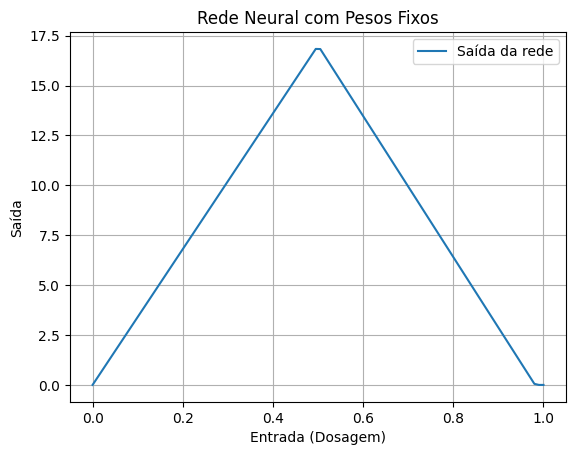

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class FixedNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Camada oculta: 1 entrada, 2 saídas (2 neurônios)
        self.hidden = nn.Linear(1, 2)
        # Camada de saída: 2 entradas (das ativações), 1 saída
        self.output = nn.Linear(2, 1)
        # ReLU
        self.relu = nn.ReLU()

        # fixa os pesos e bias
        with torch.no_grad():
            self.hidden.weight[:] = torch.tensor([[1.70], [12.6]])     # shape [2,1]
            self.hidden.bias[:]   = torch.tensor([-0.85, 0.00])        # shape [2]

            self.output.weight[:] = torch.tensor([[-40.8, 2.70]])      # shape [1,2]
            self.output.bias[:]   = torch.tensor([0.0])                # shape [1]

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.relu(self.output(x))
        return x

# Instanciando a rede
model = FixedNet()

x = torch.linspace(0, 1, 100).unsqueeze(1)

# Fazendo previsões
with torch.no_grad():
    y_pred = model(x)


plt.plot(x.numpy(), y_pred.numpy(), label='Saída da rede')
plt.xlabel('Entrada (Dosagem)')
plt.ylabel('Saída')
plt.title('Rede Neural com Pesos Fixos')
plt.grid(True)
plt.legend()
plt.show()


# B

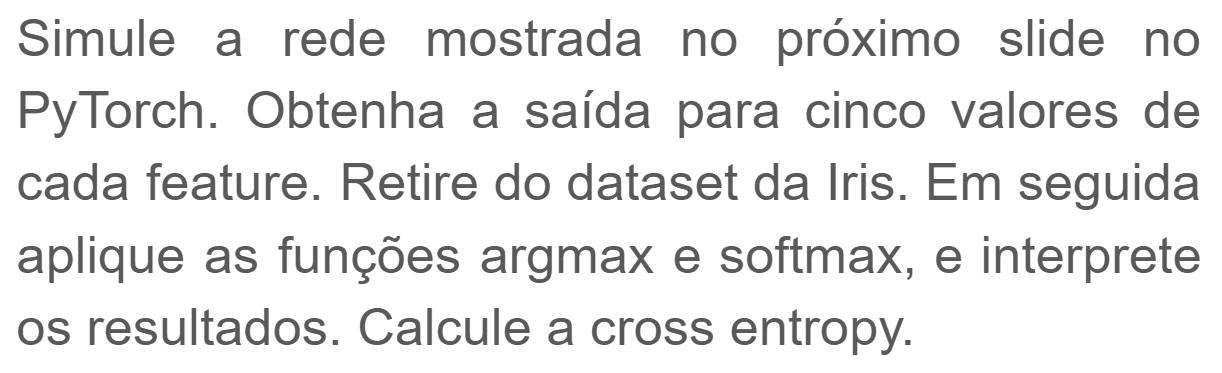

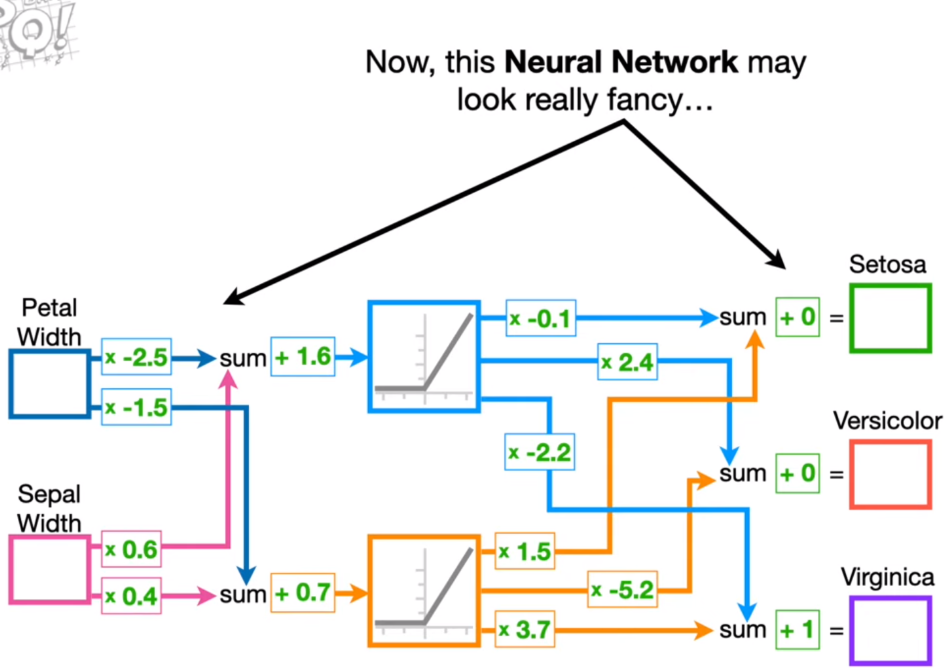

In [122]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import LabelEncoder

def get_iris_sample(index=None):
    """
    Retorna uma amostra [Petal Width, Sepal Width] como tensor shape [1, 2]
    do dataset Iris. Se index for None, escolhe uma aleatória.
    """
    iris = load_iris()
    data = iris.data  # shape [150, 4]

    # Índices dos atributos:
    # 0 - Sepal Length
    # 1 - Sepal Width
    # 2 - Petal Length
    # 3 - Petal Width

    if index is None:
        index = np.random.randint(0, len(data))

    sepal_width = data[index, 1]
    petal_width = data[index, 3]

    input_tensor = torch.tensor([[petal_width, sepal_width]], dtype=torch.float32)
    return input_tensor, iris.target_names[iris.target[index]], index


class IrisFixedNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 2)   # 2 entradas -> 2 neurônios ocultos
        self.output = nn.Linear(2, 3)   # 2 entradas ocultas -> 3 saídas (classes)
        self.relu = nn.ReLU()

        # Setando pesos e bias manualmente
        with torch.no_grad():
            # Camada oculta
            self.hidden.weight[:] = torch.tensor([
                [-2.5, 0.6],  # Neurônio azul
                [-1.5, 0.4]   # Neurônio laranja
            ])
            self.hidden.bias[:] = torch.tensor([1.6, 0.7])

            # Camada de saída
            self.output.weight[:] = torch.tensor([
                [-0.1, 1.5],   # Setosa
                [2.4, -5.2],    # Versicolor
                [-2.2, 3.7]   # Virginica
            ])
            self.output.bias[:] = torch.tensor([0.0, 0.0, 1.0])

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

model = IrisFixedNet()

# Obter uma amostra e a classe verdadeira
input_sample, true_class, sample_index = get_iris_sample()

# Converte o nome da classe para índice (0, 1 ou 2)
label_encoder = LabelEncoder()
classes = ['setosa', 'versicolor', 'virginica']
label_encoder.fit(classes)
true_class_idx = torch.tensor([label_encoder.transform([true_class])[0]])

output = model(input_sample)

# Calcular Cross Entropy
criterion = nn.CrossEntropyLoss()
loss = criterion(output, true_class_idx)

# Softmax e previsão
probs = F.softmax(output, dim=1)
predicted_class = torch.argmax(probs, dim=1).item()

print(f"Índice da amostra: {sample_index}")
print(f"Valores da amostra (PetalWidth, SepalWidth): {input_sample}")
print(f"Saída da rede: {output}")
print(f"Probabilidades (softmax): {probs}")
print(f"Classe prevista: {classes[predicted_class]}")
print(f"Classe verdadeira: {true_class}")
print(f"Cross Entropy Loss: {loss.item():.4f}")


Índice da amostra: 105
Valores da amostra (PetalWidth, SepalWidth): tensor([[2.1000, 3.0000]])
Saída da rede: tensor([[0., 0., 1.]], grad_fn=<AddmmBackward0>)
Probabilidades (softmax): tensor([[0.2119, 0.2119, 0.5761]], grad_fn=<SoftmaxBackward0>)
Classe prevista: virginica
Classe verdadeira: virginica
Cross Entropy Loss: 0.5514


# C

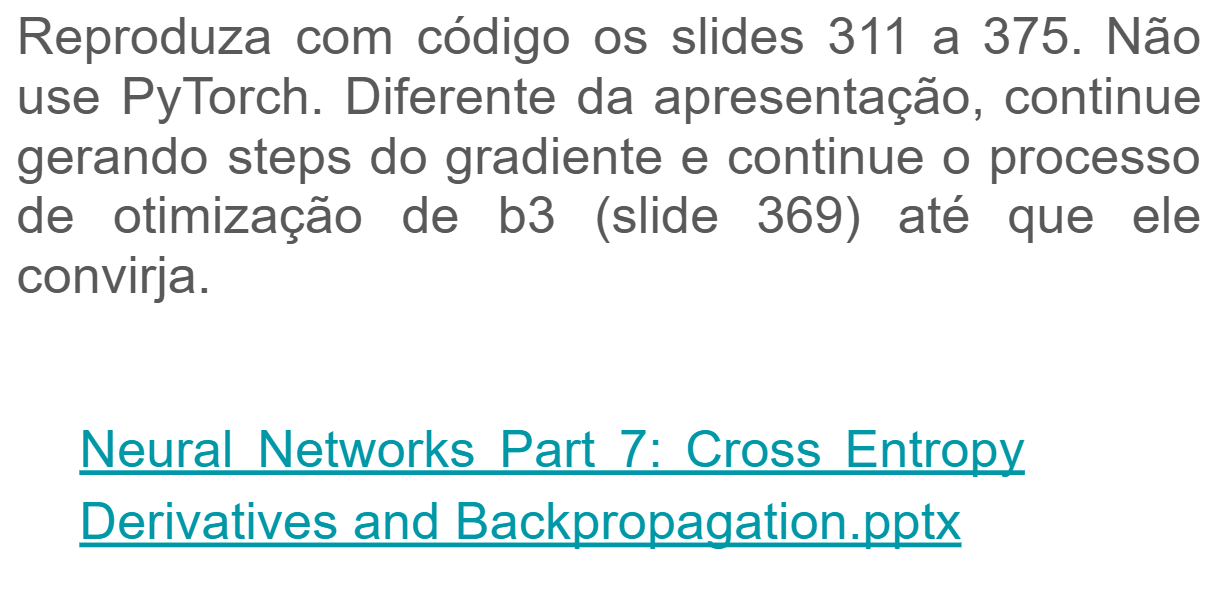

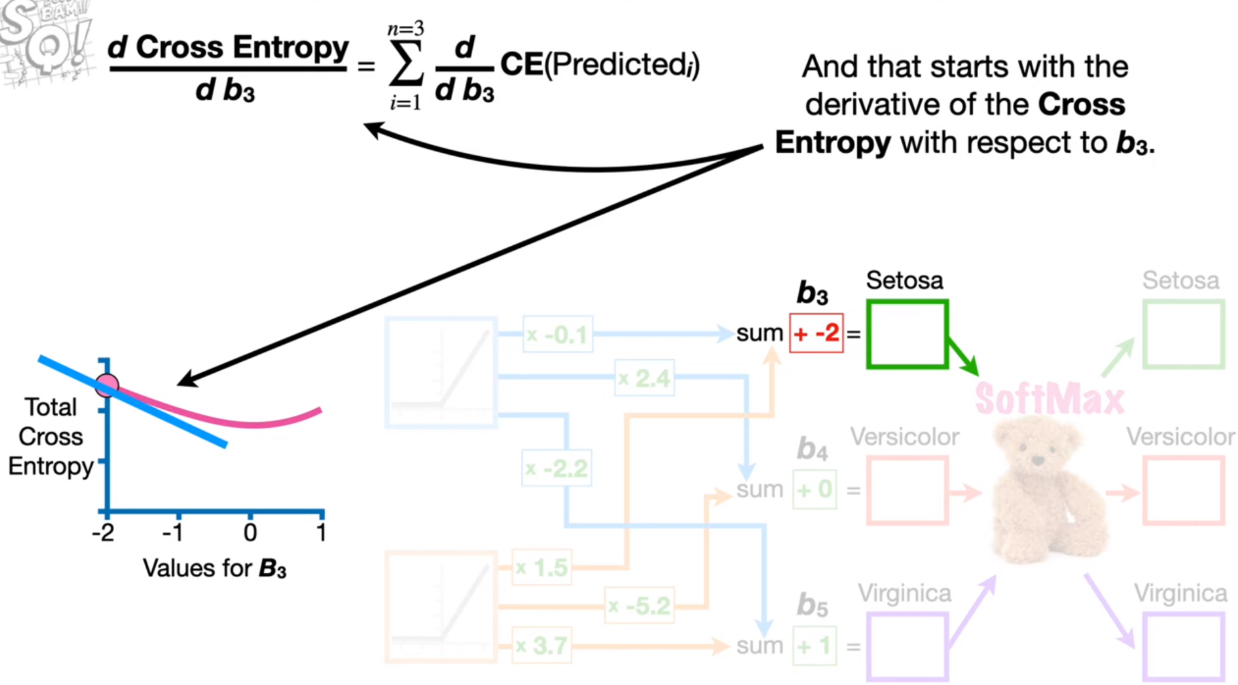

In [114]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(z):
    exps = np.exp(z - np.max(z))
    return exps / np.sum(exps)

def cross_entropy(y_pred, y_true):
    return -np.sum(y_true * np.log(y_pred + 1e-10))

#(Petal Width, Sepal Width)
x = np.array([0.04, 0.42])

# Pesos e bias da camada oculta
hidden_weights = np.array([
    [-2.5, 0.6],  # neurônio azul
    [-1.5, 0.4]   # neurônio laranja
])
hidden_bias = np.array([1.6, 0.7])

# Pesos da camada de saída (cada linha é para um neurônio de saída)
output_weights = np.array([
    [-0.1, 1.5],   # Setosa
    [ 2.4, -5.2],  # Versicolor
    [-2.2, 3.7]    # Virginica
])
output_bias = np.array([-2.0, 0.0, 1.0])

# Classe verdadeira: Setosa
y_true = np.array([1, 0, 0])

lr = 1.0
limite_gradiente = 1e-5
max_iter = 10000

for epoch in range(max_iter):
    # Camada oculta (forward)
    z_hidden = hidden_weights @ x + hidden_bias
    a_hidden = relu(z_hidden)

    # Camada de saída (forward)
    z_output = output_weights @ a_hidden + output_bias
    y_pred = softmax(z_output)
    loss = cross_entropy(y_pred, y_true)

    # Gradiente da perda em relação ao bias da saída Setosa
    grad_b_setosa = y_pred[0] - y_true[0]

    # Atualiza apenas o bias da saída (Setosa)
    output_bias[0] -= lr * grad_b_setosa

    print(f"Epoch {epoch:3d} | Loss: {loss:.6f} | Bias Setosa: {output_bias[0]:.6f} | Gradiente: {grad_b_setosa:.6f}")

    if abs(grad_b_setosa) < limite_gradiente:
        print("\nConvergência atingida.")
        break

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 5000 | Loss: 0.000200 | Bias Setosa: 8.243950 | Gradiente: -0.000200
Epoch 5001 | Loss: 0.000200 | Bias Setosa: 8.244150 | Gradiente: -0.000200
Epoch 5002 | Loss: 0.000200 | Bias Setosa: 8.244350 | Gradiente: -0.000200
Epoch 5003 | Loss: 0.000200 | Bias Setosa: 8.244550 | Gradiente: -0.000200
Epoch 5004 | Loss: 0.000200 | Bias Setosa: 8.244750 | Gradiente: -0.000200
Epoch 5005 | Loss: 0.000200 | Bias Setosa: 8.244950 | Gradiente: -0.000200
Epoch 5006 | Loss: 0.000200 | Bias Setosa: 8.245150 | Gradiente: -0.000200
Epoch 5007 | Loss: 0.000200 | Bias Setosa: 8.245350 | Gradiente: -0.000200
Epoch 5008 | Loss: 0.000200 | Bias Setosa: 8.245550 | Gradiente: -0.000200
Epoch 5009 | Loss: 0.000200 | Bias Setosa: 8.245750 | Gradiente: -0.000200
Epoch 5010 | Loss: 0.000200 | Bias Setosa: 8.245949 | Gradiente: -0.000200
Epoch 5011 | Loss: 0.000200 | Bias Setosa: 8.246149 | Gradiente: -0.000200
Epoch 5012 | Loss: 0.000200 | Bias Setosa

# D

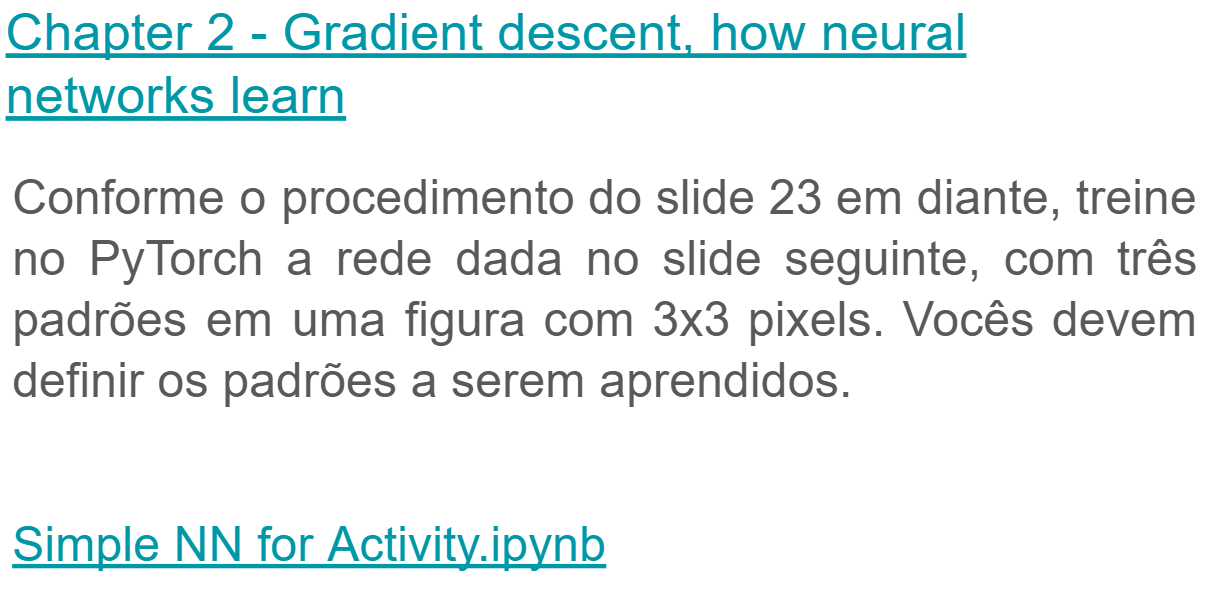

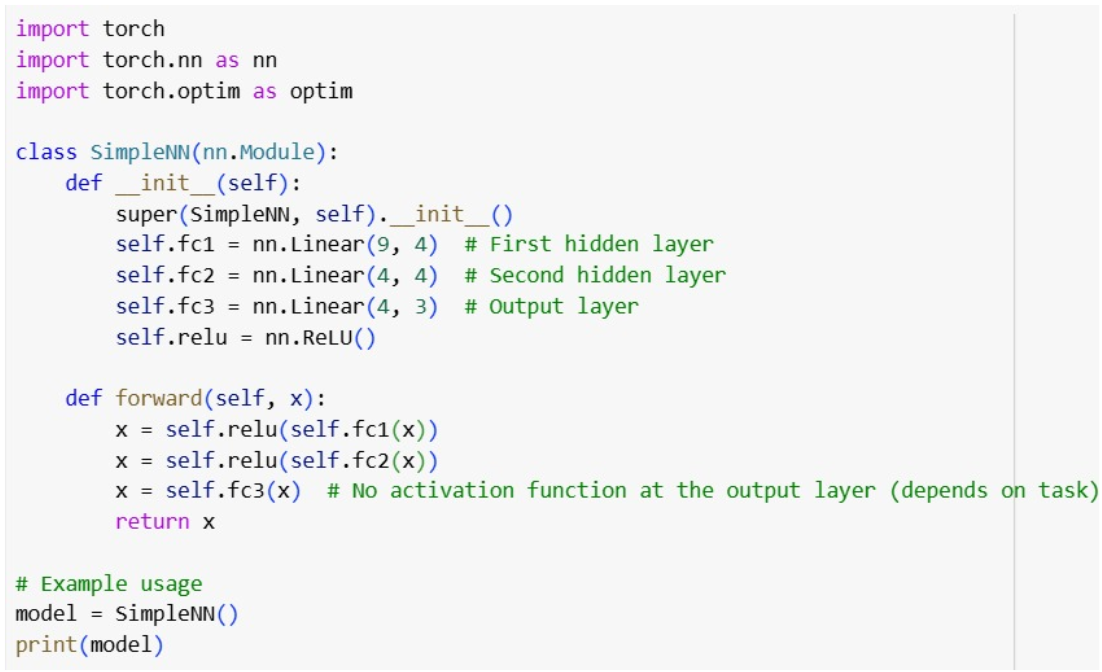

# E

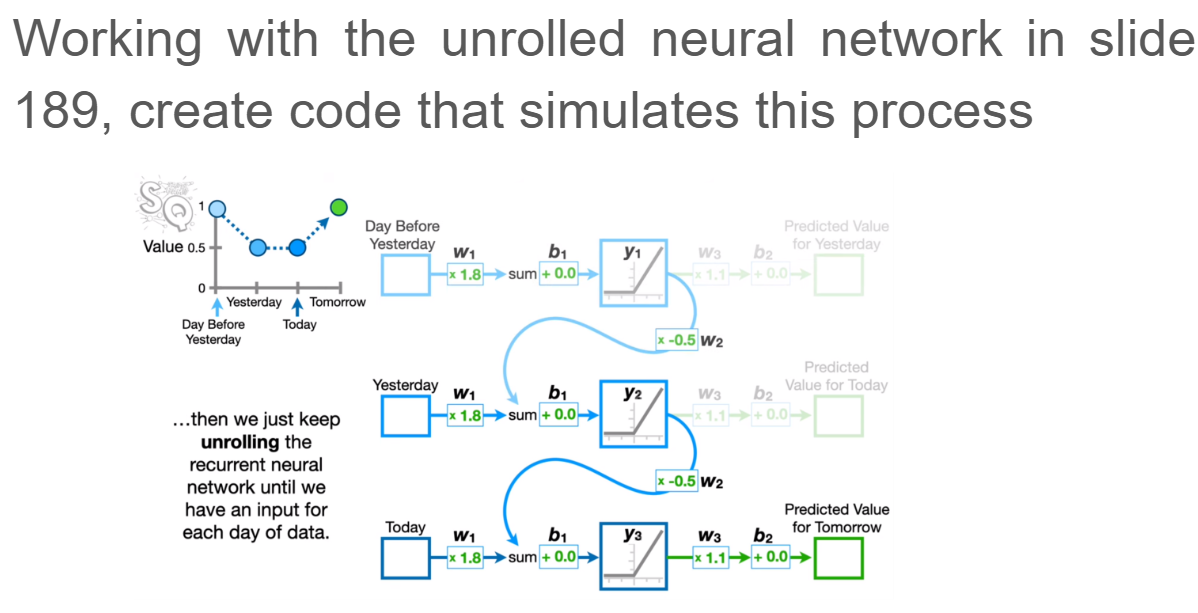

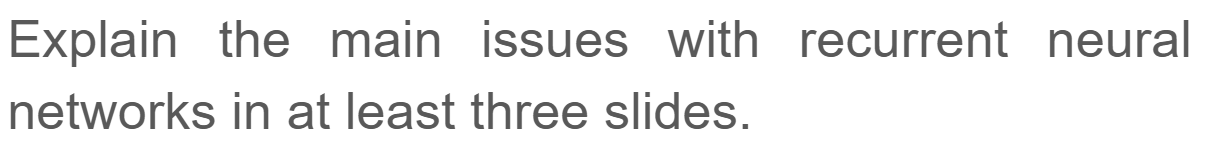

# F

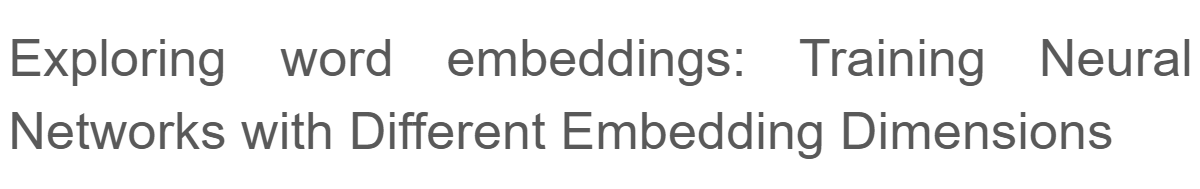

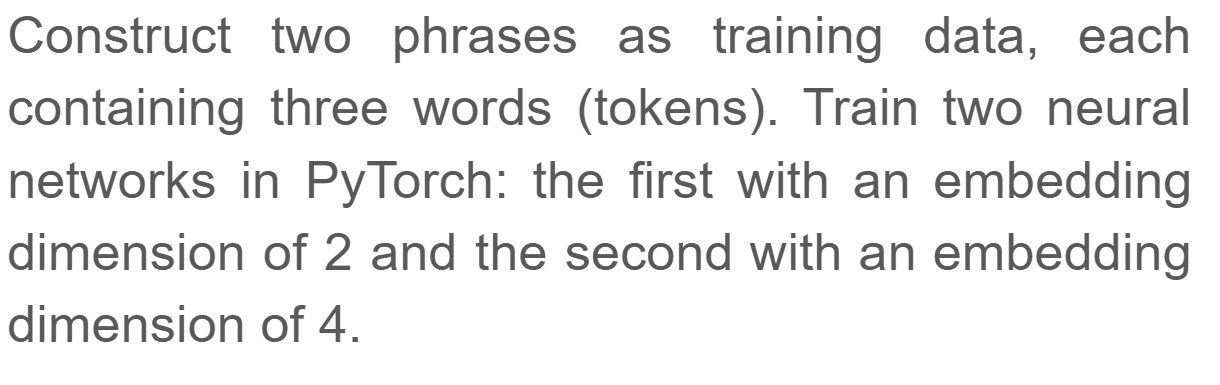

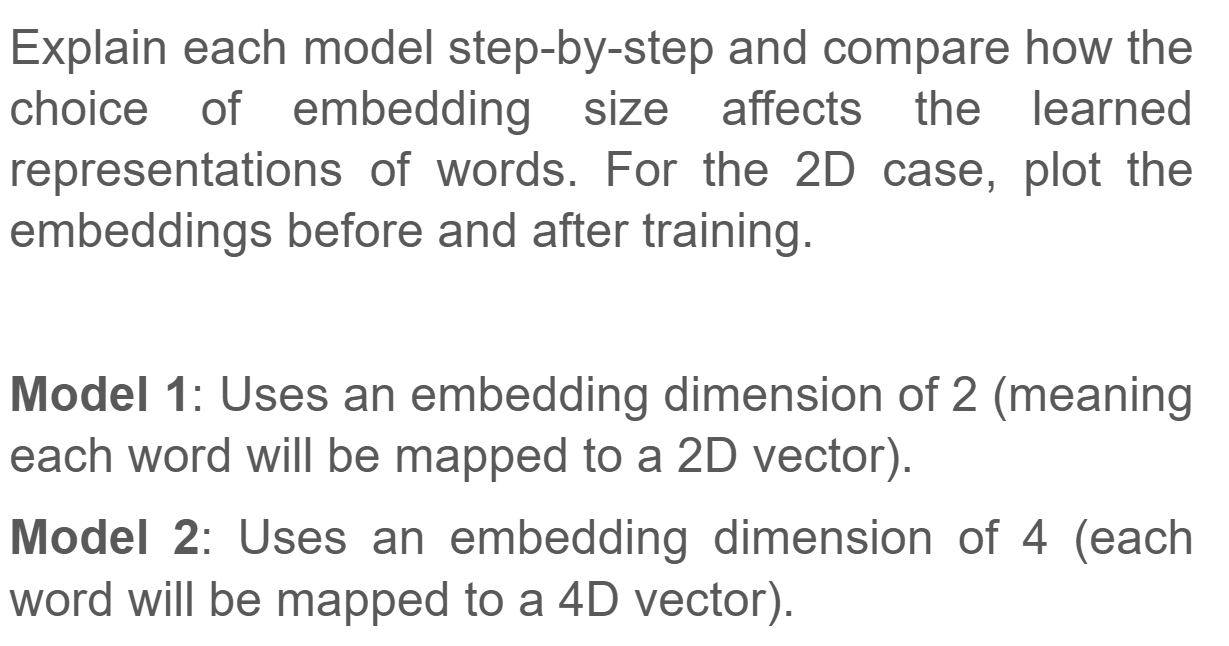